In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv("/content/BTC-USD.csv")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [16]:
print(df.columns)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.isnull().sum())
print(df.head())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  


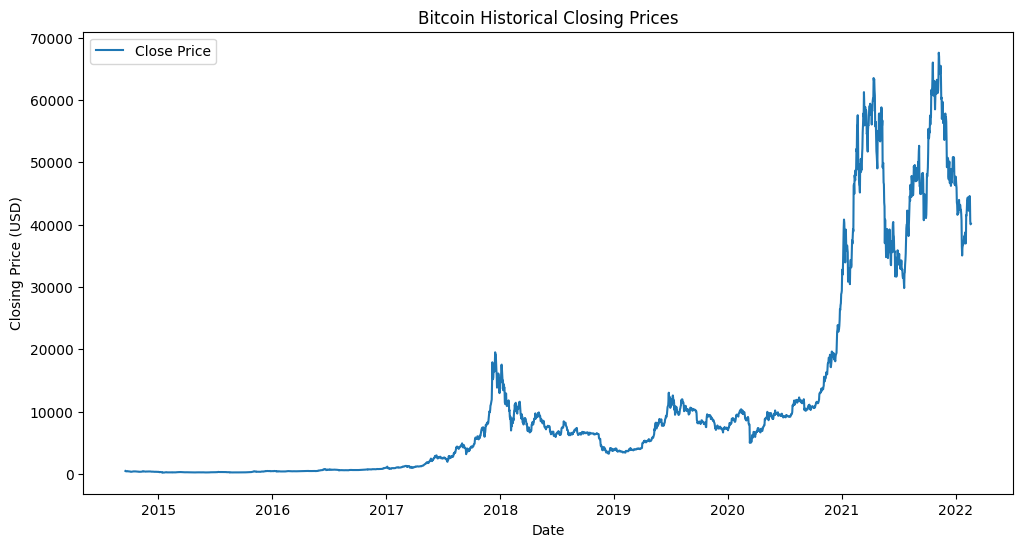

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Plot: Bitcoin Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Bitcoin Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()



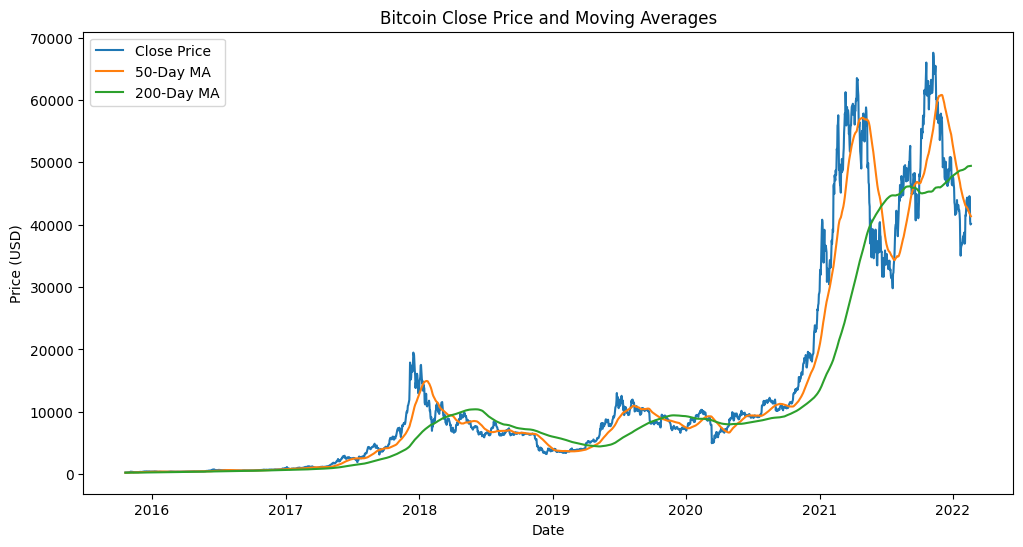

In [26]:
df['Daily Return'] = df['Close'].pct_change()*100

# moving average
df['50-Day MA'] = df['Close'].rolling(window=50).mean()
df['200-Day MA'] = df['Close'].rolling(window=200).mean()

df.dropna(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['50-Day MA'], label='50-Day MA')
plt.plot(df['200-Day MA'], label='200-Day MA')
plt.title('Bitcoin Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

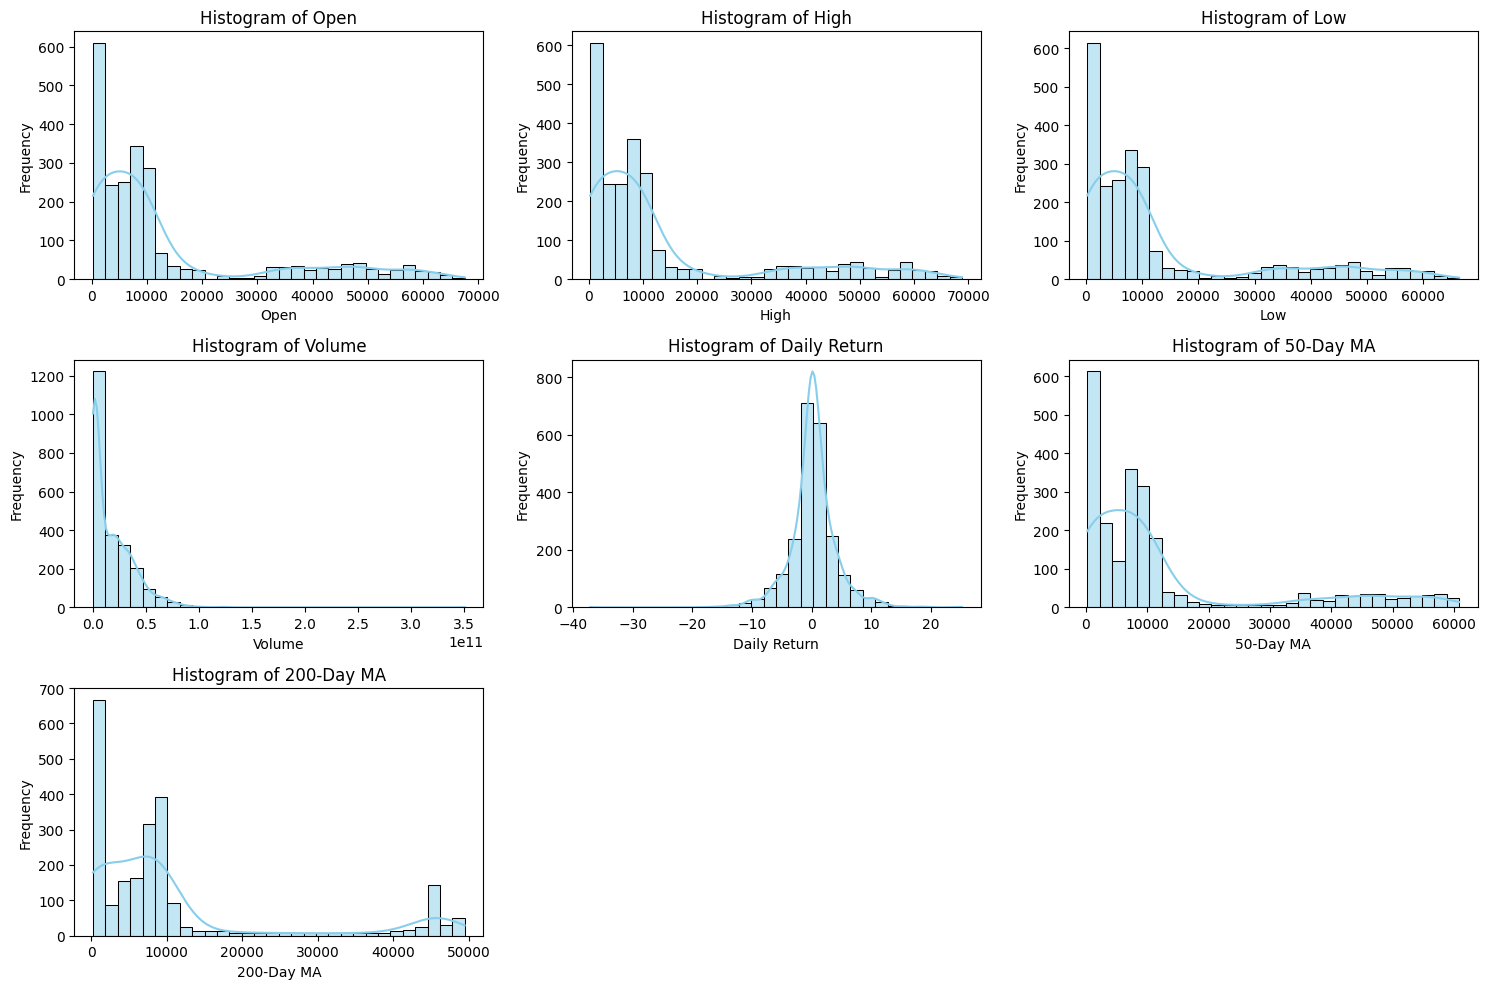

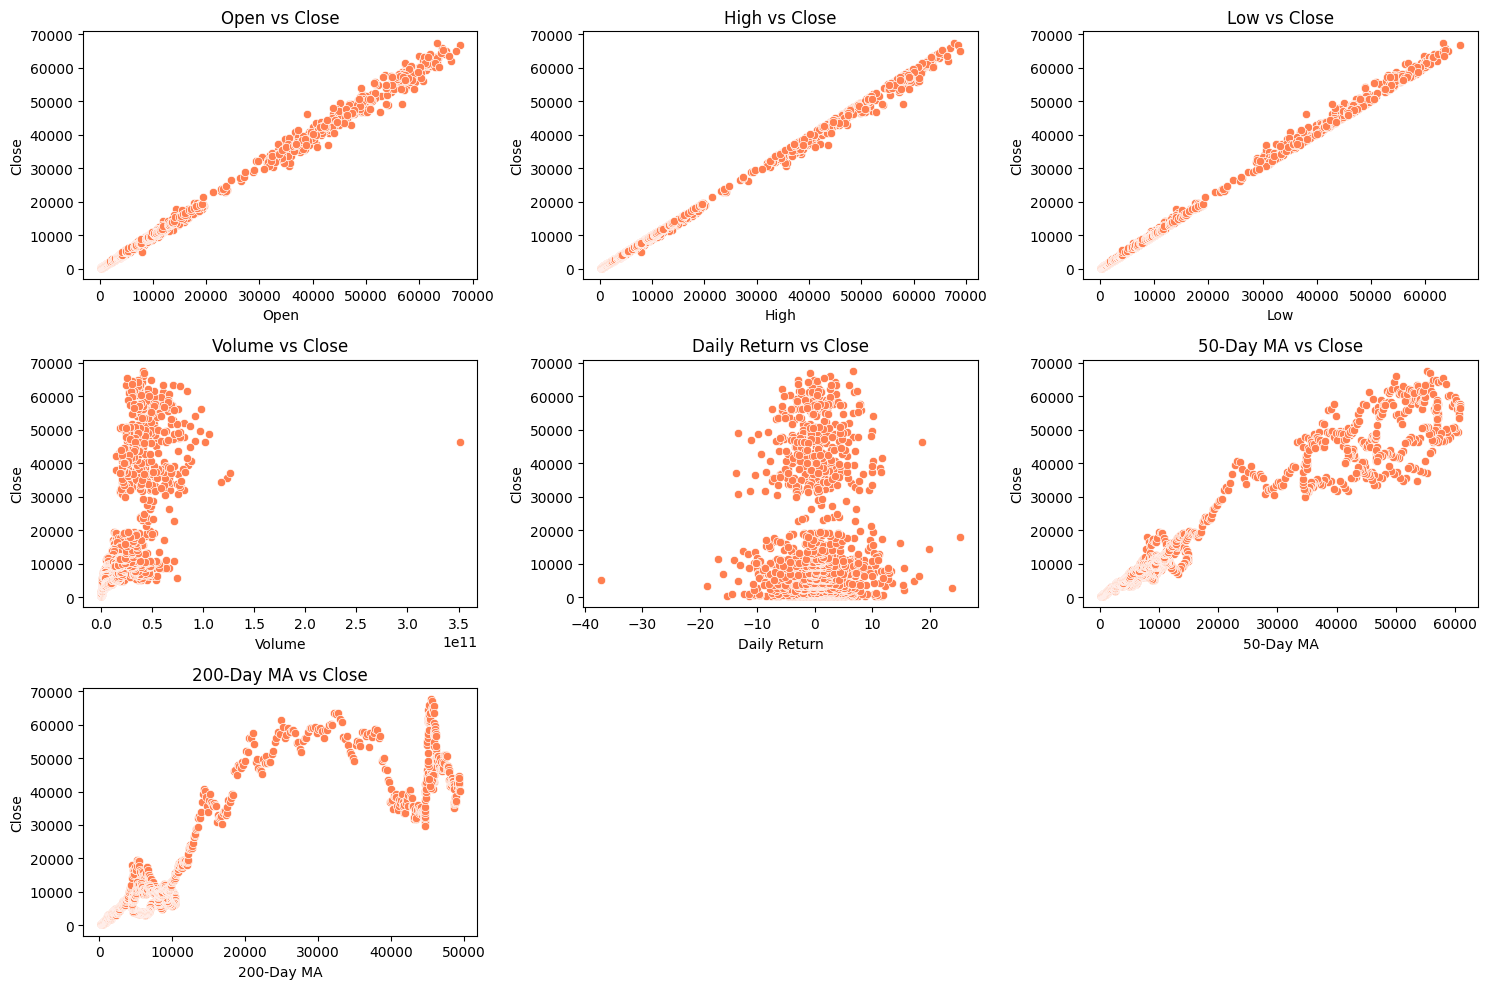

In [27]:

# List of feature columns
features = ['Open', 'High', 'Low', 'Volume', 'Daily Return', '50-Day MA', '200-Day MA']

# ----------------------------
# Histograms for Each Feature
# ----------------------------
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)  # Adjust grid size if needed
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# -------------------------------------------
# Scatter Plots: Each Feature vs. Target (Close)
# -------------------------------------------
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['Close'], color='coral')
    plt.title(f'{feature} vs Close')
    plt.xlabel(feature)
    plt.ylabel('Close')
plt.tight_layout()
plt.show()


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Return',
       '50-Day MA', '200-Day MA'],
      dtype='object')
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-10-20  263.571991  270.834991  263.226990  269.463013  269.463013   
2015-10-21  269.306000  270.769989  263.838989  266.272003  266.272003   
2015-10-22  266.496002  276.510010  266.135010  274.023010  274.023010   
2015-10-23  273.648987  278.683990  273.542999  276.496002  276.496002   
2015-10-24  276.503998  281.705994  276.503998  281.653992  281.653992   

              Volume  Daily Return   50-Day MA  200-Day MA  
Date                                                        
2015-10-20  30889800      2.287454  239.930300  246.176230  
2015-10-21  25637300     -1.184211  240.693320  246.239105  
2015-10-22  37808600      2.910936  241.588101  246.306230  
2015-10-23  29442500      0.902476  242.5

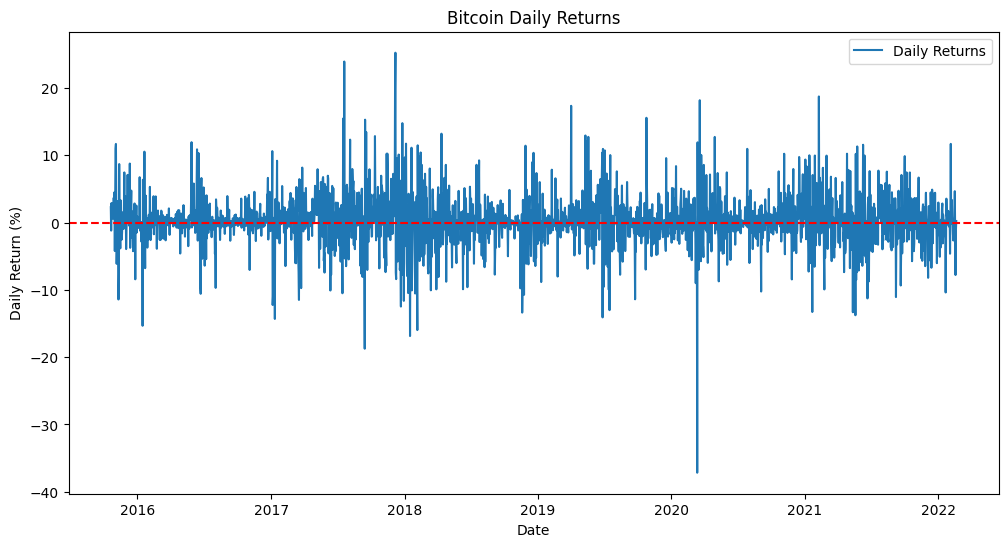

In [40]:
print(df.columns)
print(df.head())
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Daily Return'], label='Daily Returns')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Bitcoin Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.show()


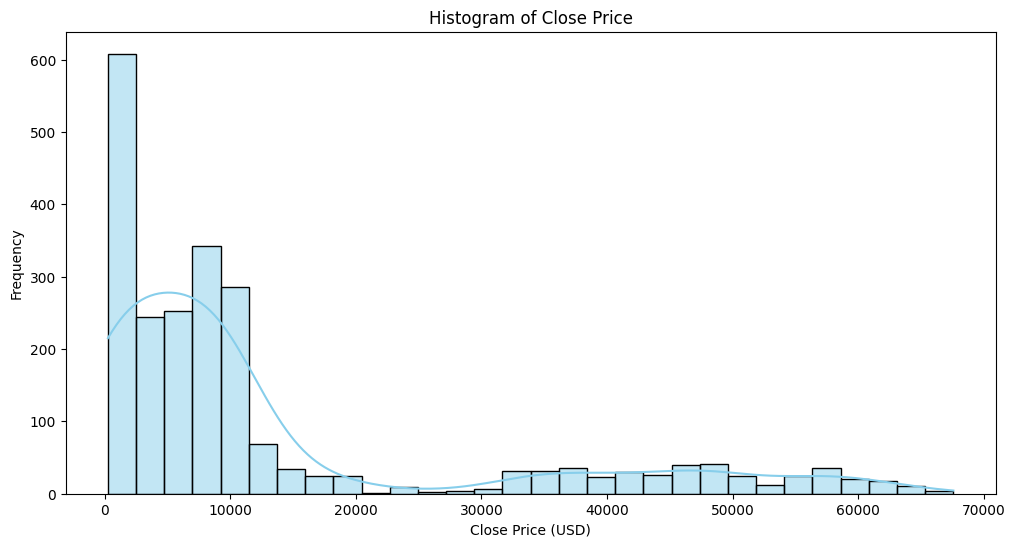

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Close Price')
plt.xlabel('Close Price (USD)')
plt.ylabel('Frequency')
plt.show()


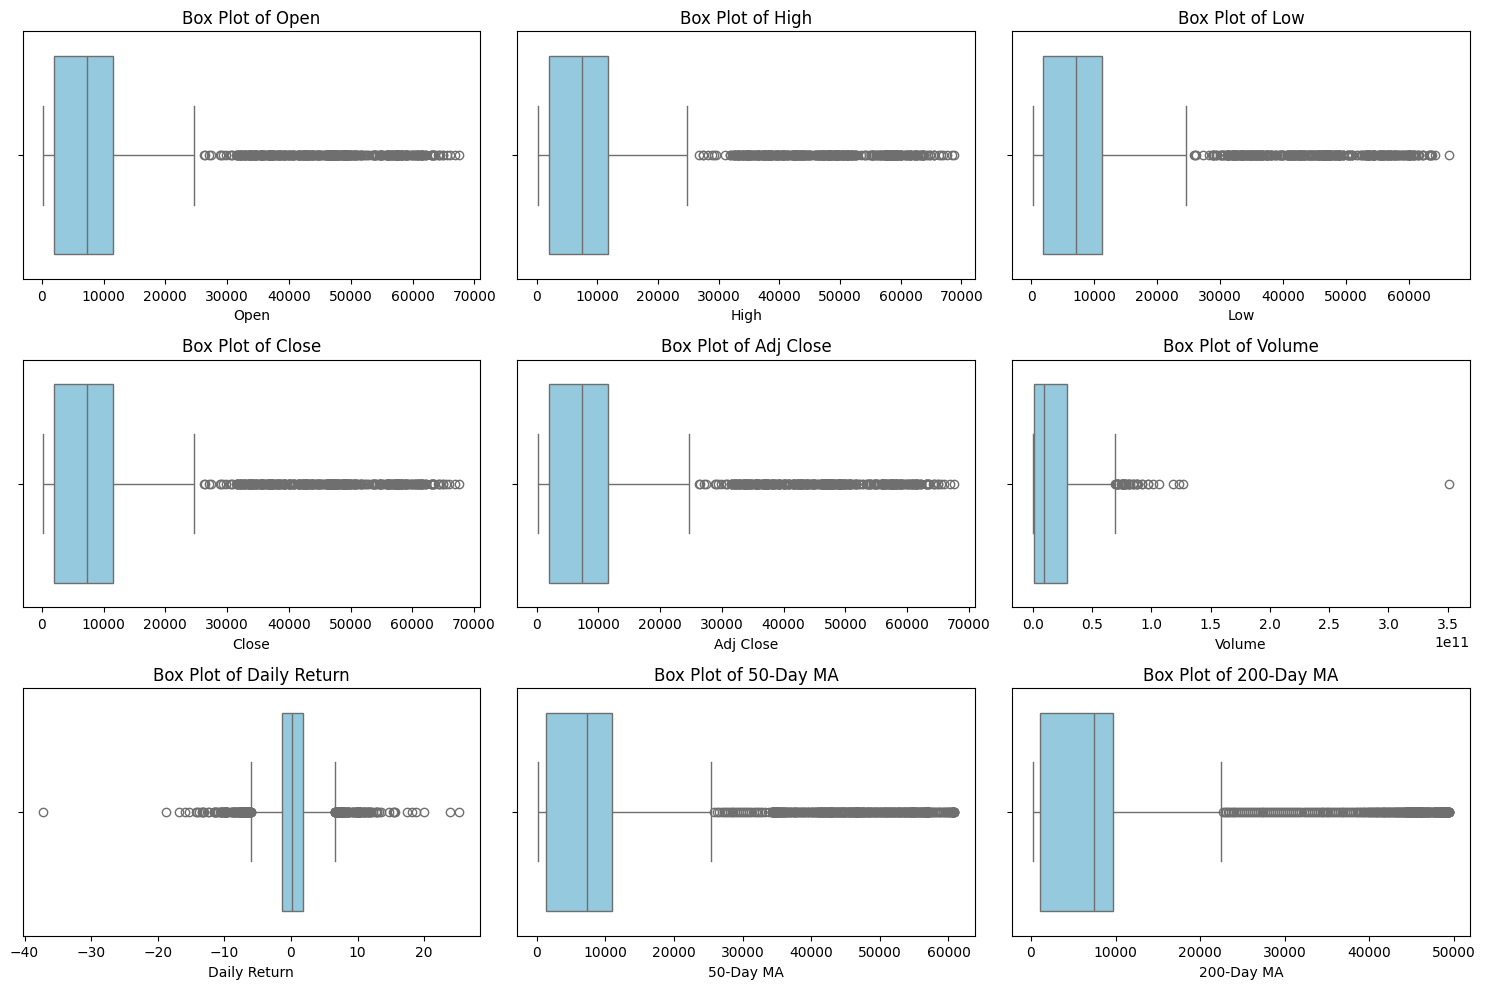

In [42]:
#box plots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)  # Adjust grid layout as needed
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [80]:
# Outlier Detection (Using IQR Method)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers per feature:\n", outliers)


Outliers per feature:
 Open            420
High            421
Low             420
Close           421
Adj Close       421
Volume           47
Daily Return    238
50-Day MA       401
200-Day MA      355
dtype: int64


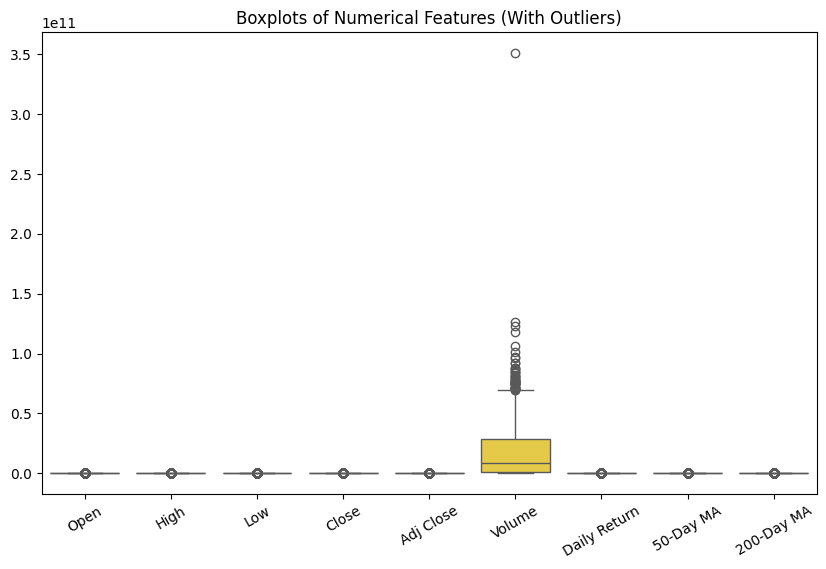

In [65]:
# Define numerical columns (excluding categorical columns)
num_cols = df.select_dtypes(include=np.number).columns

# -------------------------------
# Boxplot to Visualize Outliers
# -------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols], palette="Set2")
plt.xticks(rotation=30)
plt.title("Boxplots of Numerical Features (With Outliers)")
plt.show()

In [66]:
# Outlier Removal using IQR Method
import pandas as pd

def remove_outliers(data, columns):
    df_clean = data.copy()  # Make a copy to avoid modifying the original DataFrame
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean  # Return the cleaned DataFrame


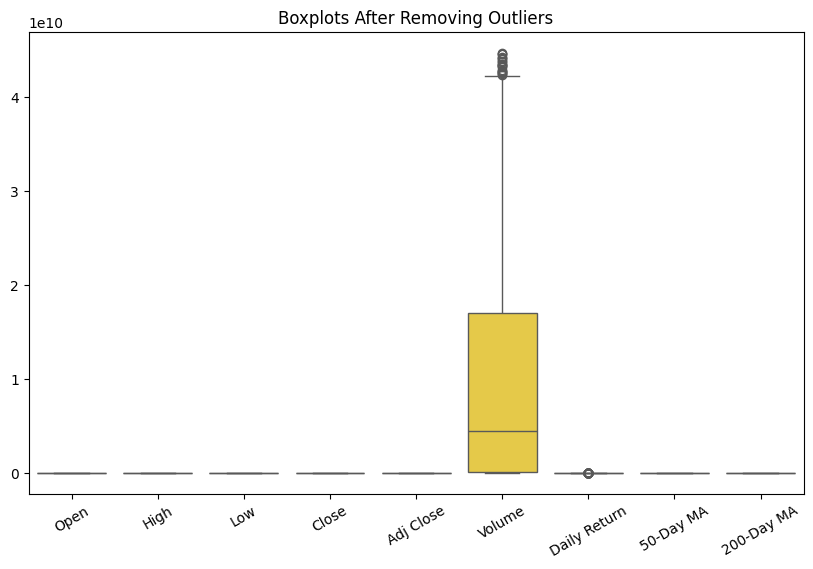

In [67]:
# Removing outliers from numerical columns
df_cleaned = remove_outliers(df, num_cols)

# -------------------------------
# Boxplot After Removing Outliers
# -------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[num_cols], palette="Set2")
plt.xticks(rotation=30)
plt.title("Boxplots After Removing Outliers")
plt.show()


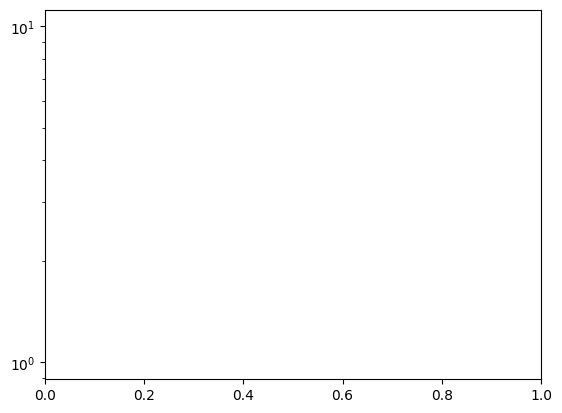

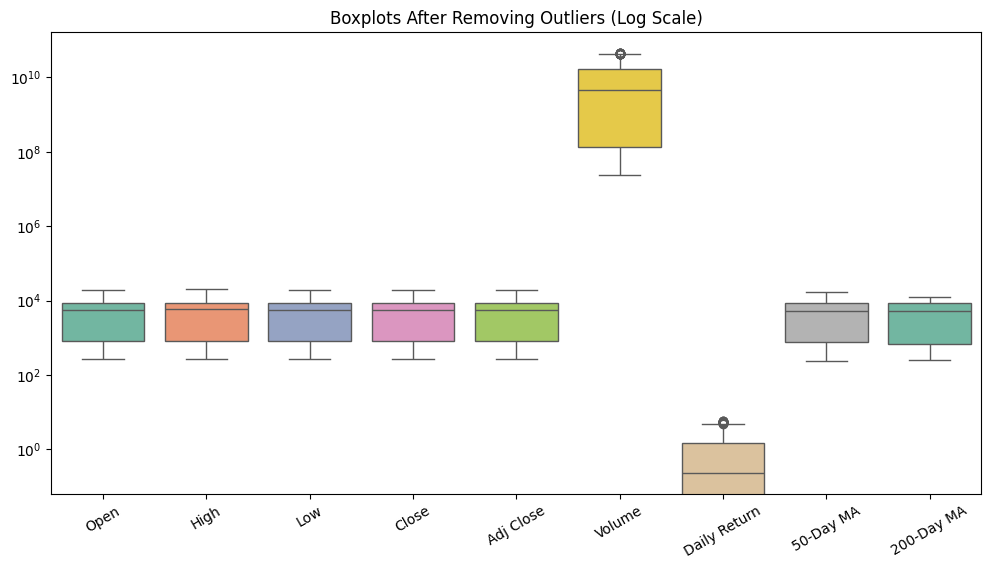

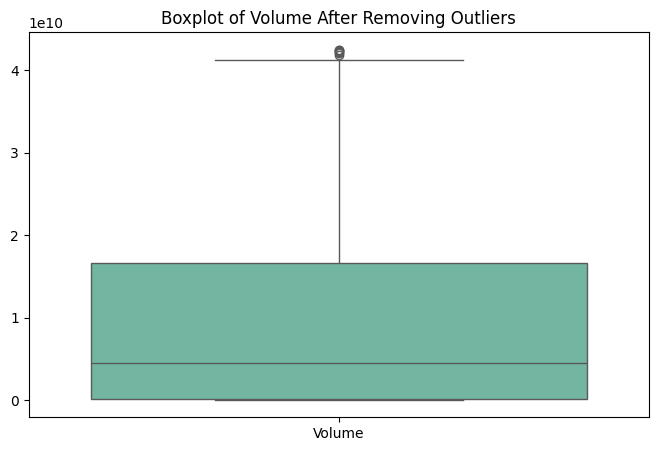

In [68]:
plt.yscale("log")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[num_cols], palette="Set2")
plt.yscale("log")  # Apply log scale
plt.xticks(rotation=30)
plt.title("Boxplots After Removing Outliers (Log Scale)")
plt.show()
df_cleaned = df_cleaned[df_cleaned["Volume"] < df_cleaned["Volume"].quantile(0.99)]
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned[["Volume"]], palette="Set2")
plt.title("Boxplot of Volume After Removing Outliers")
plt.show()


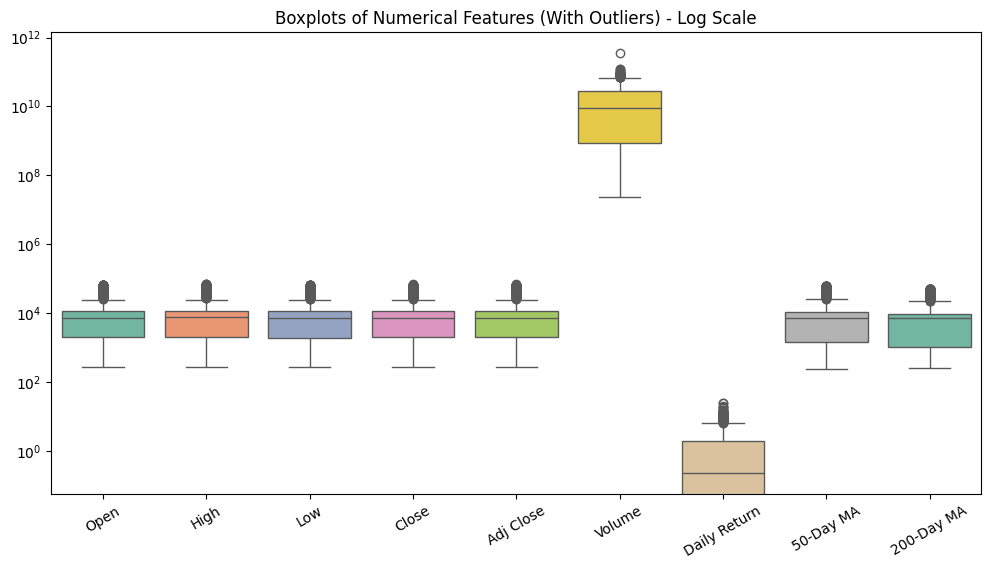

In [69]:
# Define numerical columns (excluding categorical columns)
# -------------------------------
num_cols = df.select_dtypes(include=np.number).columns

# -------------------------------
# Boxplot to Visualize Outliers (Before Removal)
# -------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], palette="Set2")
plt.yscale("log")  # Apply log scale
plt.xticks(rotation=30)
plt.title("Boxplots of Numerical Features (With Outliers) - Log Scale")
plt.show()


In [78]:
def remove_outliers(data, columns, threshold=1.5):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_cleaned = remove_outliers(df, num_cols, threshold=2.0)


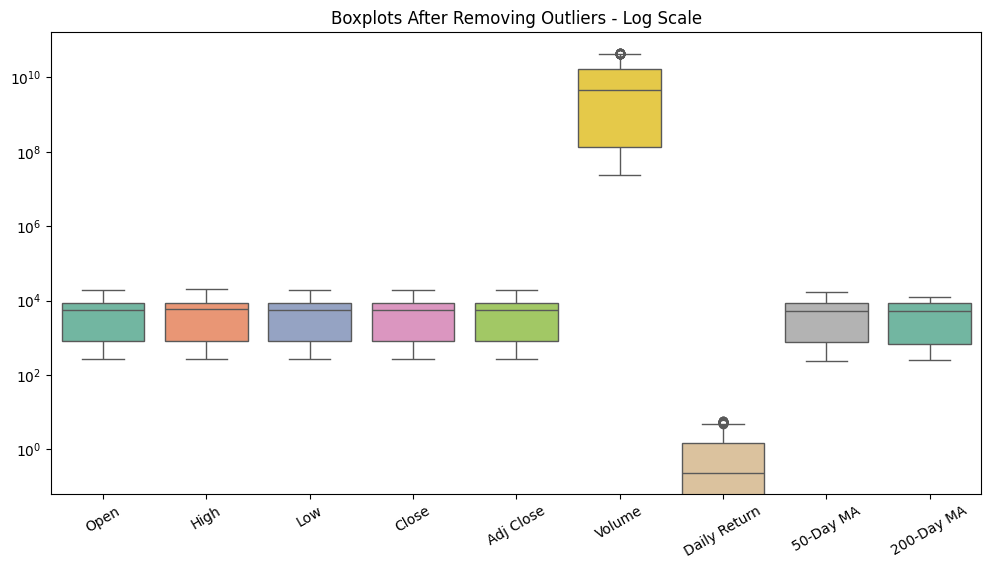

In [79]:
# Removing outliers from numerical columns
df_cleaned = remove_outliers(df, num_cols)

# -------------------------------
# Boxplot After Removing Outliers (Log Scale)
# -------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[num_cols], palette="Set2")
plt.yscale("log")  # Apply log scale
plt.xticks(rotation=30)
plt.title("Boxplots After Removing Outliers - Log Scale")
plt.show()

In [83]:
from scipy.stats import skew, kurtosis

# Assuming numeric_cols has been defined, e.g.:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Calculate Skewness and Kurtosis for each numeric column
skewness = df_cleaned[numeric_cols].apply(skew)
kurtosis_values = df_cleaned[numeric_cols].apply(kurtosis)

print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis_values)


Skewness:
 Open            0.549383
High            0.558200
Low             0.536626
Close           0.554376
Adj Close       0.554376
Volume          1.178922
Daily Return    0.009471
50-Day MA       0.296430
200-Day MA     -0.004437
dtype: float64
Kurtosis:
 Open           -0.202056
High           -0.181846
Low            -0.228494
Close          -0.186597
Adj Close      -0.186597
Volume          0.340909
Daily Return    0.146413
50-Day MA      -0.988508
200-Day MA     -1.616539
dtype: float64


In [82]:
from scipy.stats import skew, kurtosis

# Calculate Skewness and Kurtosis for each numerical column
for col in num_cols:
    print(f"{col} - Skewness: {skew(df_cleaned[col]):.2f}, Kurtosis: {kurtosis(df_cleaned[col]):.2f}")


Open - Skewness: 0.55, Kurtosis: -0.20
High - Skewness: 0.56, Kurtosis: -0.18
Low - Skewness: 0.54, Kurtosis: -0.23
Close - Skewness: 0.55, Kurtosis: -0.19
Adj Close - Skewness: 0.55, Kurtosis: -0.19
Volume - Skewness: 1.18, Kurtosis: 0.34
Daily Return - Skewness: 0.01, Kurtosis: 0.15
50-Day MA - Skewness: 0.30, Kurtosis: -0.99
200-Day MA - Skewness: -0.00, Kurtosis: -1.62


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
X = df[['Open', 'High', 'Low', 'Volume', 'Daily Return', '50-Day MA', '200-Day MA']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for models like SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the regression models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf')

# Train the models on the training data
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)

# Generate predictions on the test data
lr_pred = lr_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
svr_pred = svr_model.predict(X_test_scaled)

# Function to evaluate a model's performance
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
    print("R^2 Score:", r2_score(y_true, y_pred))
    print("\n")

# Evaluate each model
evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, rf_pred, "Random Forest Regressor")
evaluate_model(y_test, svr_pred, "Support Vector Regressor")


--- Linear Regression Evaluation ---
Mean Absolute Error: 184.1990604412099
Mean Squared Error: 147248.84488102273
R^2 Score: 0.9994990600447388


--- Random Forest Regressor Evaluation ---
Mean Absolute Error: 206.2902920791791
Mean Squared Error: 286916.5221282257
R^2 Score: 0.999023911190103


--- Support Vector Regressor Evaluation ---
Mean Absolute Error: 10556.56924104454
Mean Squared Error: 323257652.737958
R^2 Score: -0.09972118444291755


